# Hinweis zu den Aufgaben

## Folgende Dateien werden benötigt

- 10_Raw Data.csv
- 10_Heartbeat_acc.csv

## 1. Winkelgeschwindigkeit eines Plattenspielers

In [26]:
# Import required libs
import os #allows for access to environment variables
import matplotlib.pyplot as plt # plotting
import numpy as np # numerical arrays
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 5] # Skalieren der Plot-Größe

Daten einlesen. Es handelt sich um einen Sensor, der Beschleunigungen zusammen mit der Erdbeschleunigung misst. Der Sensor hat die Metadaten

|property|value|
| ---- | ----- |
|accelerometer Name|K2HH Acceleration|
|accelerometer Vendor|STM|
|accelerometer Range|39.2266|
|accelerometer Resolution|0.0011971008|
|accelerometer MinDelay|10000|
|accelerometer MaxDelay|200000|
|accelerometer Power|0.13|
|accelerometer Version|1|

Diese sind leider ohne Einheiten angegeben.

In [27]:
data_dir = "../input-data"
acc_dat = pd.read_csv(os.path.join(data_dir,'10_Raw Data.csv'), sep=",") 

Benutzen Sie den "display"-Befehl, um die Daten darzustellen.

In [28]:
display(acc_dat)

Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0      0.020899               -1.459266                1.624466   
1      0.030962               -1.413776                1.612495   
2      0.040747               -1.382651                1.612495   
3      0.050841               -1.381454                1.618480   
4      0.061146               -1.400608                1.629254   
...         ...                     ...                     ...   
4892  48.940717               -0.828394                2.509123   
4893  48.950946               -0.831985                2.573767   
4894  48.960906               -0.822408                2.653973   
4895  48.970732               -0.817620                2.721010   
4896  48.980716               -0.820014                2.759317   

      Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
0                   9.843760                      10.083053  
1                   9.891644                      10.121439  
2                   9.903615                      10.128843  
3                   9.873688                      10.100376  
4                   9.811439                      10.043928  
...                      ...                            ...  
4892                9.882068                      10.229233  
4893                9.751583                      10.119775  
4894                9.581595                       9.976317  
4895                9.478644                       9.895307  
4896                9.470264                       9.898089  

[4897 rows x 5 columns]

Benennen Sie die Spalten des Datensatzes zur bequemeren Verwendung um. Hinweis: *.rename(). 

In [29]:
acc_ren = acc_dat.rename(columns={'Time (s)':'time', 'Acceleration x (m/s^2)':'ax', 'Acceleration y (m/s^2)':'ay', 'Acceleration z (m/s^2)':'az', 'Absolute acceleration (m/s^2)':'aabs'}, index={'ONE': 'Row_1'})

Sehen Sie sich eine Zusammenfassung des umbenannten Datensatzes an. Hinweis: *.describe()

In [30]:
acc_ren.describe()

time           ax           ay           az         aabs
count  4897.000000  4897.000000  4897.000000  4897.000000  4897.000000
mean     24.501017    -0.881409    -0.087287     9.709134     9.834030
std      14.137869     0.690875     1.078553     0.237597     0.200832
min       0.020899    -3.197456    -2.548628     8.342596     8.632112
25%      12.261417    -1.310825    -0.628478     9.736021     9.751362
50%      24.500967    -1.292869    -0.612916     9.767146     9.873522
75%      36.740937    -0.272939     0.033519     9.775525     9.881099
max      48.980716     2.890999     2.932897    12.011710    12.011830

Ist die Zeit zwischen zwei konsekutiven Samples gleich? Benutzen Sie dazu ein Histogramm über die Differenzen zweier konskutiver Werte. Hinweis 'diff' und 'hist'. Berechnen Sie ferner die mittlere Samplingfrequenz.

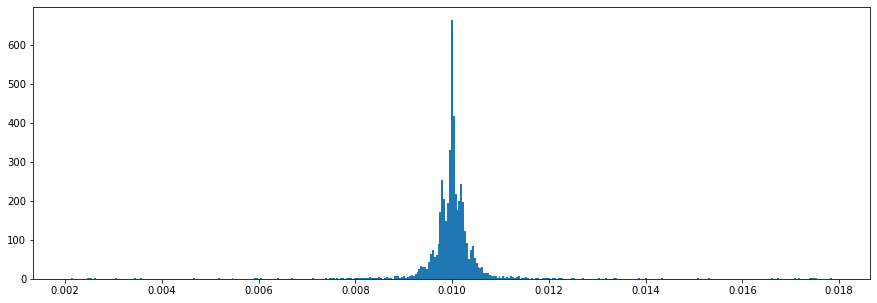

Die Samplingfrequenz ist 100.0003729813748 Hz


In [31]:
dt = np.diff(acc_ren.time)
plt.hist(dt, bins='auto')
plt.show()
fsamp = 1/np.mean(dt)
print('Die Samplingfrequenz ist', fsamp, 'Hz') # in Hz

Plotten Sie eine geeignete Beschleunigungskomponente gegen die Zeit.

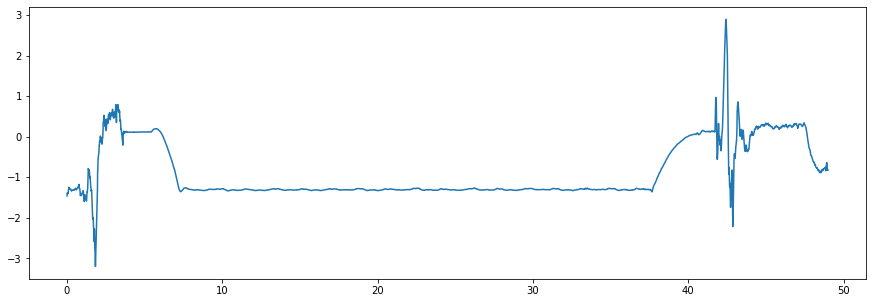

In [32]:
plt.plot(acc_ren.time, acc_ren.ax)

Bestimmen Sie einen geeigneten Zeitabschnitt für die Auswertung. Hinweis: Die Messung begann, bevor das Smartphone auf den Plattenspieler gelegt wurde, und endete erst, nachdem es wieder abgenommen wurde. Plotten Sie zur Kontrolle diesen Zeitabschnitt.

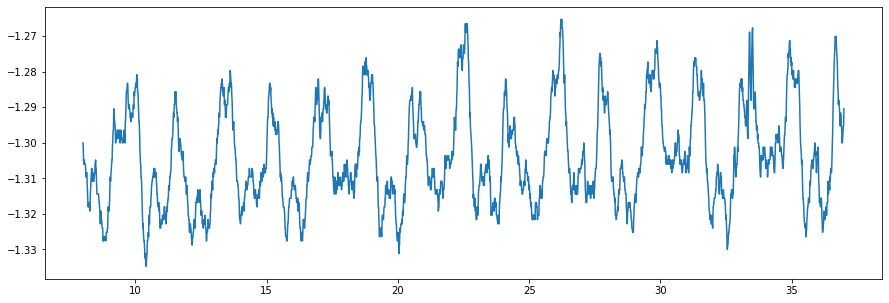

In [33]:
time_range = np.where((acc_ren.time > 8) & (acc_ren.time <= 37))[0]
plt.plot(acc_ren.time[time_range], acc_ren.ax[time_range])

Plotten Sie die Autokorrelationsfunktion dieses Signales. Wählen Sie dazu einen geeigneten Bereich. Hinweis: in pandas gibt es dazu 'plotting.autocorrelation_plot' und dazu *.set_xlim.

(0.0, 1000.0)

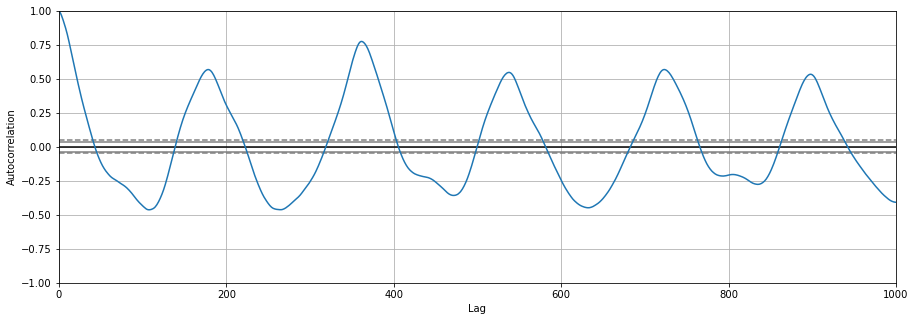

In [34]:
acf = pd.plotting.autocorrelation_plot(acc_ren.ax[time_range])
acf.set_xlim([0, 1000])

Bestimmen Sie den Wert des ersten Maximums, also *nach* dem bei Null. Hinweis: pandas kennt Serien (*.Series) und von diesen Autokorrelationen. Überprüfen Sie Ihr Ergebnis an dem obigen Plot.

In [35]:
ser = pd.Series(acc_ren.ax[time_range])
max_ind = 100 + np.argmax(np.vectorize(ser.autocorr)(np.arange(100,300)))
print('Maximum bei:', max_ind, 'mit einer Korrelation von', round(ser.autocorr(max_ind), 2))

Maximum bei: 178 mit einer Korrelation von 0.6


Diesen Index können Sie nun verwenden, um die zugehörige Dauer eines Umlaufes zu bestimmen.

In [36]:
Tges = acc_ren.time[max_ind]
60/Tges

33.29945827542192

## 2. Atmungsfrequenz aus Beschleunigungssensordaten bestimmen

Es handelt sich um denselben Sensor wie aus Aufgabe 1. Das Smartphone wurde in Rückenlage auf dem Brustkorb in der Nähe des Herzens platziert. 
Der messbare Effekt kann hier *zwei* mögliche physikalische Ursachen haben: 

    - Die Verdrehung des Koordinatensystems des Sensors gegenüber der Erdbeschleunigigung,
    - Die Beschleunigung selber.

In [37]:
data_dir = "../input-data"
hf_acc = pd.read_csv(os.path.join(data_dir,'10_Heartbeat_acc.csv'), sep="\t")
display(hf_acc)

Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0      0.018039                2.311602                8.497022   
1      0.028049                2.357092                8.455123   
2      0.038038                2.396596                8.427590   
3      0.048038                2.428918                8.408437   
4      0.058031                2.467225                8.407239   
...         ...                     ...                     ...   
8672  86.739876                0.633266                8.165425   
8673  86.748741                0.645237                8.112753   
8674  86.758146                0.645237                8.112753   
8675  86.768607                0.629675                8.009802   
8676  86.778157                0.629675                8.009802   

      Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
0                  -3.988740                       9.667105  
1                  -3.830723                       9.577026  
2                  -3.743334                       9.527880  
3                  -3.685874                       9.496690  
4                  -3.646369                       9.490252  
...                      ...                            ...  
8672               -3.697845                       8.986059  
8673               -3.731363                       8.952997  
8674               -3.731363                       8.952997  
8675               -4.920084                       9.421287  
8676               -4.920084                       9.421287  

[8677 rows x 5 columns]

Datensatz wie oben umbenennen und beschreiben.

In [38]:
acc_ren = hf_acc.rename(columns={'Time (s)':'time', 'Acceleration x (m/s^2)':'ax', 'Acceleration y (m/s^2)':'ay', 'Acceleration z (m/s^2)':'az', 'Absolute acceleration (m/s^2)':'aabs'}, index={'ONE': 'Row_1'})
acc_ren.describe()

time           ax           ay           az         aabs
count  8677.000000  8677.000000  8677.000000  8677.000000  8677.000000
mean     43.398350     1.782167    -0.254436     8.649262     9.722866
std      25.049789     0.757183     2.059014     3.424607     0.235285
min       0.018039     0.221464    -2.568978    -7.272388     6.874641
25%      21.708504     1.552640    -0.864307     9.504981     9.709090
50%      43.398177     1.705869    -0.835576     9.536105     9.726735
75%      65.088902     1.832761    -0.727837     9.572019     9.743347
max      86.778157     8.283937     8.639477    11.456255    13.503526

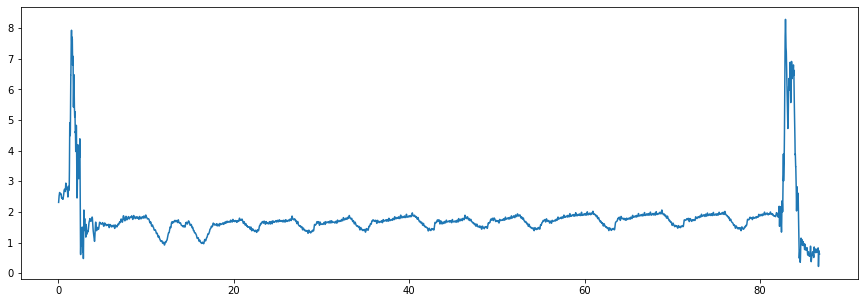

In [39]:
plt.plot(acc_ren.time, acc_ren.ax)

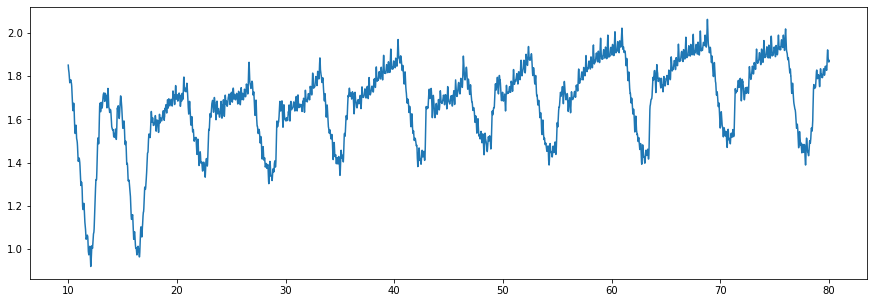

In [40]:
time_range = np.where((acc_ren.time > 10) & (acc_ren.time <= 80))[0]
plt.plot(acc_ren.time[time_range], acc_ren.ax[time_range])

(0.0, 2000.0)

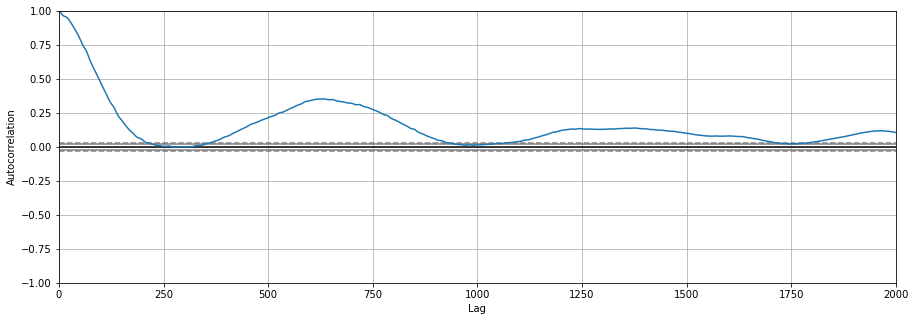

In [41]:
acf = pd.plotting.autocorrelation_plot(acc_ren.ax[time_range])
acf.set_xlim([0, 2000])

In [42]:
ser = pd.Series(acc_ren.ax[time_range])
max_ind = 300 + np.argmax(np.vectorize(ser.autocorr)(np.arange(300,800)))
print('Index =', max_ind)
Tges = acc_ren.time[max_ind]
print('Atemperiode in s =', Tges)
print('Atemfrequenz pro Minute =', 60/Tges)

Index = 655
Atemperiode in s = 6.568151072
Atemfrequenz pro Minute = 9.134990858505027


Vergleichen Sie Ihr Ergebnis mit den Erfahrungen, die Sie bereits mit der Fouriertransformation aus früheren Lehrveranstaltungen erworben haben.

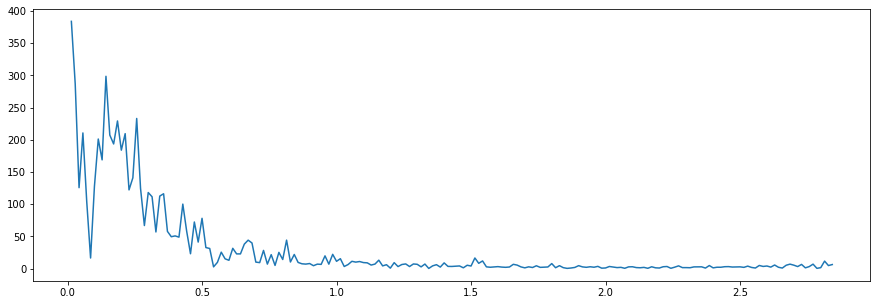

In [43]:
hf_dft = np.fft.fft(acc_ren.ax[time_range])

# Frequenzen bestimmen
fft_freq = np.fft.fftfreq(time_range.size, d=np.mean(dt))

# Darstellung des Betrages
dft_amp = abs(hf_dft)
plt.plot(fft_freq[1:200], dft_amp[1:200])

Bestimmen Sie nun die Frequenzen mit den höchsten Amplituden. Hinweis: .argsort() ind flip aus numpy. Sehen Sie sich diese auf ihre Interpretierbarkeit an.

In [82]:
# Frequenzen bestimmen

# Nur positive Frequenzen betrachten und nach Amplitude sortieren; Ausgabe ist Index, fallend sortiert.
amp_sort_ind = dft_amp[0:dft_amp.shape[0]//2].argsort()

# Die höchsten Werte zuerst, also nun aufsteigend sortiert
hf_dft_ind = np.flip(amp_sort_ind)

# Maxima ansehen
print('Maxima bei', fft_freq[hf_dft_ind[0:10]], 'Hertz')

Maxima bei [0.         0.01428577 0.14285768 0.02857154 0.25714382 0.18571498
 0.05714307 0.21428651 0.15714344 0.11428614] Hertz


In [81]:
# Die ersten interpretierbaren der führenden Frequenzen (außer der Konstanten) bestimmen
freq_ind = 2
Tges = 1/fft_freq[hf_dft_ind[freq_ind]]

print('Atemperiode in s =', round(Tges, 2))
print('Atemfrequenz pro Minute =', round(60/Tges, 2))

Atemperiode in s = 7.0
Atemfrequenz pro Minute = 8.57
